[link text](
## My approach:
1. Data Cleaning
	+ removed punctuation
	+ also removed keyword like `len`, `time`
	+ append all the `info` in a sentence
2. feature generation
	+ use regex for further cleaning 
	+ generate `TFIDF` based feature
	+ removed highly occurred words such as status and other
	+ used `htttps-links` as a string
3. Clustering
	+ kmean-clustering is used
	+ topic modelling)(but didn't worked out properly, need more tuning and cleaning)
)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import gc, os
import warnings
warnings.filterwarnings("ignore")

fatal: destination path 'resume' already exists and is not an empty directory.


In [8]:
with open("DataSet/train_set.txt",'r') as f:
    train = [line.strip() for line in f.readlines()]
    
train = [{"LineNumber": line.split()[0], "Text": line.split()[1:]} for line in train]
train = pd.DataFrame(train)

with open("DataSet/public_test_set.txt",'r') as f:
    test1 = [line.strip() for line in f.readlines()]
    
test1 = [{"LineNumber": line.split()[0], "Text": line.split()[1:]} for line in test1]
test1 = pd.DataFrame(test1)

with open("DataSet/private_test_set.txt",'r') as f:
    test2 = [line.strip() for line in f.readlines()]
    
test2 = [{"LineNumber": line.split()[0], "Text": line.split()[1:]} for line in test2]
test2 = pd.DataFrame(test2)

train['LineNumber'] = train['LineNumber'].apply(lambda x: x[:x.find("~")])
test1['LineNumber'] = test1['LineNumber'].apply(lambda x: x[:x.find("~")])
test2['LineNumber'] = test2['LineNumber'].apply(lambda x: x[:x.find("~")])

train.head().append(test1.head())

,LineNumber,Text
0,L0,"[34703, INFO, gs.openstack.wsgi.server, [, req..."
1,L1,"[39946, INFO, gs.openapi.server, [, req-0fpkx-..."
2,L2,"[94359, INFO, gs.api.openstack.compute.wsgi, [..."
3,L3,"[80828, INFO, gs.resource.claims, [, req-j1yt-..."
4,L4,"[01,, 2019_13:20:00, 44944, INFO, gs.resource...."
0,L0,"[14,, 2019_13:20:00, 58233, INFO, gs.openapi.s..."
1,L1,"[PM, 60109, INFO, gs.openstack.server, [, req-..."
2,L2,"[80226, INFO, gs.compute.manager, [, req-6od5m..."
3,L3,"[07,, 2019_13:04, 57889, INFO, gs.openstack.se..."
4,L4,"[11,, 2019_23:18:00, 61822, INFO, gs.api.opena..."


In [9]:
import string
puncts = list(string.punctuation)

import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text)
    text = re.sub(r'-', " ", text)
    text = text[text.find("info") : text.find("len")]
#     text = re.sub(r'https?://[A-Za-z0-9./]+', '', text)   
#     text = re.sub(r'www.[^ ]+', '', text)  
#     text = re.sub(r'[a-zA-Z0-9]*www[a-zA-Z0-9]*com[a-zA-Z0-9]*', '', text)  
#     text = re.sub(r'[^a-zA-Z]', ' ', text)   
    text = [token for token in text.split() if len(token) > 2]
    text = ' '.join(text)
    return text

train['Text'] = train['Text'].apply(lambda x: " ".join(x))
train['Text'] = train['Text'].apply(clean_text)

test1['Text'] = test1['Text'].apply(lambda x: " ".join(x))
test1['Text'] = test1['Text'].apply(clean_text)

test2['Text'] = test2['Text'].apply(lambda x: " ".join(x))
test2['Text'] = test2['Text'].apply(clean_text)


train.head().append(test1.head()).append(test2.head())


,LineNumber,Text
0,L0,info gs.openstack.wsgi.server req y9mjwk n1yj ...
1,L1,info gs.openapi.server req 0fpkx 6purm vpog en...
2,L2,info gs.api.openstack.compute.wsgi req ufxz lc...
3,L3,info gs.resource.claims req j1yt 0n37 nji3 xkf...
4,L4,info gs.resource.claims req fcvp 2m85w bdsu2p ...
0,L0,info gs.openapi.server req qvrlz kqijyd easb2 ...
1,L1,info gs.openstack.server req n7w9u tn296 gmw3 ...
2,L2,info gs.compute.manager req 6od5mc e6ba xd16 h...
3,L3,info gs.openstack.server req kyum oi5g w4q2 e8...
4,L4,info gs.api.openapi.compute.wsgi req y9mjwk 6d...


In [0]:
words = dict()
for row in data['Text1']:
    for d in row.split(" "):
        if words.get(d) is None:
            words[d] = 1
        else:
            words[d] = words.get(d) + 1

In [45]:
for d in data['Text1'][:10]:
    print(d)

info gs.openstack.wsgi.server req y9mjwk n1yj 6wl35r nhwlbg http exception thrown: entry found for any even
info gs.openapi.server req 0fpkx 6purm vpog enwlc a32lk creating event network vif plugged: for instanc
info gs.api.openstack.compute.wsgi req ufxz lctxos ogc53 l89bg creating event network vif plugged: for instanc
info gs.resource.claims req j1yt 0n37 nji3 xkf8 creating event network vif plugged: for instanc
info gs.resource.claims req fcvp 2m85w bdsu2p voi178 "delete /v2/lw7jq0tyfi3n1pxu/servers/details http/1.1" status: 204
info gs.openstack.server req hfujap 564sz a7s4 59rz o74f "get /latest/meta data/block device mapping/ami http/1.1" status: 404
info gs.resource.manager req 6g9t ydjr7v 0eyq f1zgu creating event network vif plugged: for instanc
info gs.api.openstack.compute.wsgi req q2b5x 59rz 9abg "get /latest/meta data/block device mapping/ami http/1.1" status: 200
info gs.compute.manager req pt2zo dr2nm 2bi3 ndrl instance: a0um ugkq 6x7z5 total disk upper limit not define

In [0]:
word_dict = pd.DataFrame()
word_dict['word'] = words.keys()
word_dict['count'] = words.values()

In [0]:
# word_dict.sort_values(by="count", ascending=False).head(50)

In [0]:
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF

def tfidf_feature(train, test, col_name, min_df=3, analyzer='word', 
                  token_pattern=r'\w{1,}', ngram=3, stopwords='english', 
                  n_component=120, decom_flag=False, which_method='svd', 
                  max_features=None, feat_col_name='svd'):

    tfv = TfidfVectorizer(min_df=min_df,  max_features=max_features, 
                strip_accents='unicode', analyzer=analyzer, max_df=0.95, 
                token_pattern=token_pattern, ngram_range=(1, ngram), 
                use_idf=1, smooth_idf=1, sublinear_tf=1,
                stop_words = stopwords)

    complete_df = pd.concat([train[col_name], test[col_name]], axis=0)
#         return complete_df
#         print(complete_df.shape, complete_df.columns)

    tfv.fit(list(complete_df[:].values))

    if decom_flag is False:
        train_tfv =  tfv.transform(train[col_name].values.ravel()) 
        test_tfv  = tfv.transform(test[col_name].values.ravel())

        del complete_df
        gc.collect()
        return train_tfv, test_tfv, tfv
    else:
        complete_tfv = tfv.transform(complete_df[:].values.ravel())
        
        if which_method is 'svd':
            svd = TruncatedSVD(n_components=n_component)
            svd.fit(complete_tfv)
            complete_dec = svd.transform(complete_tfv)
        else:
            nmf = NMF(n_components=n_component, random_state=1234, alpha=0, l1_ratio=0)
            nmf.fit(complete_tfv)            
            complete_dec = nmf.fit_transform(complete_tfv)            
        
        
        complete_dec = pd.DataFrame(data=complete_dec)
        complete_dec.columns = [feat_col_name+'_'+str(i) for i in range(n_component)]

        train_dec = complete_dec.iloc[:train.shape[0]]
        test_dec = complete_dec.iloc[train.shape[0]:].reset_index(drop=True)

        del complete_dec, complete_df
        gc.collect()
        print("="*15, " done ", "="*15)
        return train_dec, test_dec, complete_tfv, tfv

def countvect_feature(train, test, col_name, min_df=3, 
                      analyzer='word', token_pattern=r'\w{1,}', 
                      ngram=3, stopwords='english', max_features=None):

    ctv = CountVectorizer(min_df=min_df,  max_features=max_features, 
                strip_accents='unicode', analyzer=analyzer, 
                token_pattern=token_pattern, ngram_range=(1, ngram), 
                stop_words = stopwords)

    complete_df = pd.concat([train[col_name], test[col_name]], axis=0)
    ctv.fit(list(complete_df[:].values))

    train_tf =  ctv.transform(train[col_name].values.ravel()) 
    test_tf  = ctv.transform(test[col_name].values.ravel())

    del complete_df
    gc.collect()
    return train_tf, test_tf, ctv


def get_count_vectorizer(df, col_name, min_df=3, analyzer='word', stopwords='english', 
                     token_pattern=r'\w{1,}', ngram=3, max_features=None):
    ctv = CountVectorizer(min_df=min_df,  max_features=max_features, 
                strip_accents='unicode', analyzer=analyzer, 
                token_pattern=token_pattern, ngram_range=(1, ngram), 
                stop_words = stopwords)

    ctv.fit(list(df[col_name].values))

    df_new =  ctv.transform(df[col_name].values.ravel()) 
    return df_new


def get_tfidf_feature(df, col_name, min_df=3, analyzer='word', stopwords='english',
                  token_pattern=r'\w{1,}', ngram=3, max_features=None):

    tfv = TfidfVectorizer(min_df=min_df,  max_features=max_features, 
                strip_accents='unicode', analyzer=analyzer, max_df=0.95, 
                token_pattern=token_pattern, ngram_range=(1, ngram), 
                use_idf=1, smooth_idf=1, sublinear_tf=1,
                stop_words = stopwords)

    tfv.fit(list(df[col_name].values))
    df_new =  tfv.transform(df[col_name].values.ravel()) 
    
    return df_new


# def compute_idf(strings_list):
#     n = len(strings_list)
#     idf = dict.fromkeys(strings_list[0].keys(), 0)
#     for l in strings_list:
#         for word, count in l.items():
#             if count > 0:
#                 idf[word] += 1
    
#     for word, v in idf.items():
#         idf[word] = log(n / float(v))
#     return idf
    

# def compute_tf_idf(tf, idf):
#     tf_idf = dict.fromkeys(tf.keys(), 0)
#     for word, v in tf.items():
#         tf_idf[word] = v * idf[word]
#     return tf_idf
    



In [0]:
def get_tfidf_feature(df, col_name, min_df=3, analyzer='word', stopwords='english',
                  token_pattern=r'\w{1,}', ngram=3, max_features=None):

    tfv = TfidfVectorizer(min_df=min_df,  max_features=max_features, 
                strip_accents='unicode', analyzer=analyzer, max_df=0.95, 
                token_pattern=token_pattern, ngram_range=(1, ngram), 
                use_idf=1, smooth_idf=1, sublinear_tf=1,
                stop_words = stopwords)

    tfv.fit(list(df[col_name].values))
    
    return tfv

In [0]:
tfidf = get_tfidf_feature(train, col_name="Text", min_df=3, analyzer='word', 
                          stopwords='english',
                          token_pattern=r'\w{1,}', ngram=3, 
                          max_features=None)
tr_idf  =  tfidf.transform(train['Text'].values.ravel()) 
ts1_idf =  tfidf.transform(test1['Text'].values.ravel()) 
ts2_idf =  tfidf.transform(test2['Text'].values.ravel()) 


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10).fit(tr_idf)

Text(0.5, 1.0, 'frequecy plot of kmean clustering')

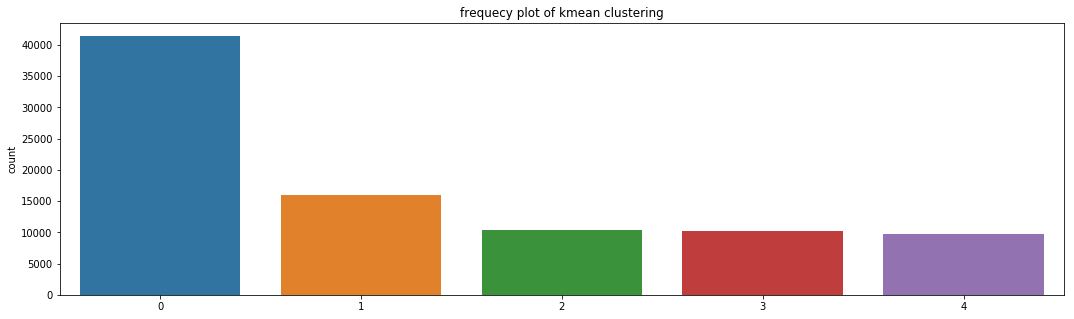

In [67]:
preds = kmeans.predict(tr_idf)

fig, ax = plt.subplots(1,1, figsize=(18,5))    
sns.countplot(preds, ax=ax)
ax.set_title("frequecy plot of kmean clustering")

In [0]:
data['pred'] = preds

In [72]:
data[data['pred'] == 4]['Text1'].values

array(['info gs.openstack.server req hfujap 564sz a7s4 59rz o74f "get /latest/meta data/block device mapping/ami http/1.1" status: 404',
       'info gs.api.openstack.compute.wsgi req q2b5x 59rz 9abg "get /latest/meta data/block device mapping/ami http/1.1" status: 200',
       'info gs.resource.claims req r36js 1khtw bid2 op4ryu "get /latest/meta data/block device mapping/ami http/1.1" status: 200',
       ...,
       'info gs.compute.manager req ndrl 53ijn h9pg "get /latest/meta data/block device mapping/ami http/1.1" status: 404',
       'info gs.openstack.wsgi.server req 2aque d7zuw6 1yaqrz "get /latest/meta data/block device mapping/root http/1.1" status: 404',
       'info gs.openstack.server req vpog kw0tiv ws0mh "get /latest/meta data/block device mapping/ami http/1.1" status: 200'],
      dtype=object)

In [73]:
data[data['pred'] == 3]['Text1'].values

array(['info gs.openapi.server req 0fpkx 6purm vpog enwlc a32lk creating event network vif plugged: for instanc',
       'info gs.api.openstack.compute.wsgi req ufxz lctxos ogc53 l89bg creating event network vif plugged: for instanc',
       'info gs.resource.claims req j1yt 0n37 nji3 xkf8 creating event network vif plugged: for instanc',
       ...,
       'info gs.compute.resource_tracker req gmw3 8aqge joh69 zmogv creating event network vif plugged: for instanc',
       'info gs.openstack.server req v3fcs ahegn 0eyq creating event network vif plugged: for instanc',
       'info gs.compute.manager req lem3a rhezju igbe5 ioxmw creating event network vif plugged: for instanc'],
      dtype=object)

In [74]:
data[data['pred'] == 2]['Text1'].values

array(['info gs.openstack.wsgi.server req y9mjwk n1yj 6wl35r nhwlbg http exception thrown: entry found for any even',
       'info gs.resource.claims req 1pje6m 8cqjwp op4ryu 1eq4 http exception thrown: entry found for any even',
       'info gs.openstack.wsgi.server req s5mc2 lco1 j1yt http exception thrown: instances found for any even',
       ...,
       'info gs.resource.claims req ved5la st19 nac86 http exception thrown: instances found for any even',
       'info gs.resource.manager req h0m2 ptcl 63u9fq http exception thrown: instances found for any even',
       'info gs.resource.claims req b7con1 z4rqj7 n80j6 http exception thrown: entry found for any even'],
      dtype=object)

In [75]:
data[data['pred'] == 1]['Text1'].values

array(['info gs.resource.claims req fcvp 2m85w bdsu2p voi178 "delete /v2/lw7jq0tyfi3n1pxu/servers/details http/1.1" status: 204',
       'info gs.openstack.wsgi.server req rvkx sxer sgnvfi l8i6v "delete /v2/nc9rbshkjp3mivt28gw5uy46qlz1edao/servers/details http/1.1" status: 202',
       'info gs.api.openapi.compute.wsgi req h0kd o74f vla0s 3g0j6 7vse1y "get /v2/2019 user_data.json http/1.1" status: 404',
       ...,
       'info gs.openstack.wsgi.server req xtqs zwa26p pkgfom ntaj "get /v2/2019 user_data.json http/1.1" status: 404',
       'info gs.compute.manager req fns8p kzunes 8t26 6hb83 9ifn "post /v2/c7pmb1dvgq5fiunlw4o0rxyj/servers/details http/1.1" status: 404',
       'info gs.api.openstack.compute.wsgi req cm93ef 4yrq2 er9xy 4nbsil gm59z "post /v2/qkfumht602aerpijvgx83cdn/servers/details http/1.1" status: 202'],
      dtype=object)

In [76]:
data[data['pred'] == 0]['Text1'].values

array(['info gs.compute.manager req pt2zo dr2nm 2bi3 ndrl instance: a0um ugkq 6x7z5 total disk upper limit not defined, defaulting unlimite',
       'info gs.resource.resource_tracker req wud8m ydjr7v 10wn base swap file too young remove: /var/lib/gs/instances/_base/57sy1o 8913pu tfz',
       'info gs.compute.resource_tracker req 53ijn fipw ufwp 4ih9m active base files: /var/lib/gs/instances/_base/53ijn fipw ufwp 4ih9',
       ...,
       'info gs.compute.resource_tracker req 8sa2 moywpf glde instance: kz6vg ax5skc 5zws 5u3f a7s4 instance destroyed successfull',
       'info gs.openapi.server req 4uz8 rbdla 92zvgh uab0iz sgjlu instance: 2x0buc x2sl 2u03 paused (lifecycle event',
       'info gs.compute.resource_tracker req 4t85u rsjok9 q2b5x wxf6 2bi3 instance: xtqs dwqbe1 8t9m stopped (lifecycle event'],
      dtype=object)

In [20]:
sub2.shape, ts2_idf.shape

((1050,), (1050, 37599))

In [0]:
sub1 = kmeans.predict(ts1_idf)
sub2 = kmeans.predict(ts2_idf)

public = pd.DataFrame()
private = pd.DataFrame()

public['LineNumber'] = test1['LineNumber']
private['LineNumber'] = test2['LineNumber']

public['Class'] = sub1
private['Class'] = sub2


public.to_csv("sub1.csv", index=None)
private.to_csv("sub2.csv", index=None)

In [23]:
!ls

resume	sample_data  sub1.csv  sub2.csv


In [0]:
from google.colab import files
# files.download("sub1.csv") 
files.download("sub2.csv") 

In [0]:
files.download("sub2.csv") 

In [60]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import LatentDirichletAllocation

# cv = CountVectorizer(max_df=0.97,min_df=2,stop_words='english')
# term_matrix = cv.fit_transform(data['Text1'])
# # print(term_matrix)


# ## topic moddeling using 10 component

# lda = LatentDirichletAllocation(n_components=10, n_jobs=4)
# lda.fit(term_matrix)

# topic_word_dict = {}
# for index,topic in enumerate(lda.components_):
#     words = [cv.get_feature_names()[i] for i in topic.argsort()[-5:]]
#     topic_word_dict[index] = words
#     print('Top words for topic {}'.format(index))
#     print(words)
#     print('-'*120)

Top words for topic 0
['wsgi', 'compute', 'server', 'successfull', 'instance']
------------------------------------------------------------------------------------------------------------------------
Top words for topic 1
['compute', 'server', 'lifecycle', 'event', 'instance']
------------------------------------------------------------------------------------------------------------------------
Top words for topic 2
['_base', 'base', 'instances', 'lib', 'var']
------------------------------------------------------------------------------------------------------------------------
Top words for topic 3
['2019', 'json', 'http', 'v2', 'status']
------------------------------------------------------------------------------------------------------------------------
Top words for topic 4
['openapi', 'openstack', 'compute', 'wsgi', 'server']
------------------------------------------------------------------------------------------------------------------------
Top words for topic 5
['http', '